#Sales Forecasting Model

##Importing Libraries & Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [187]:

data = pd.read_csv('/content/drive/MyDrive/train.csv')
data.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Category  \
0      42420.0  South  FUR-BO-10001798        Furniture    Bookcases   
1      42420.0  South  FUR-CH-10000454        Furniture       Chairs   
2      90036.0   West  OFF-LA-10000240  Office Supplies       Labels   
3      33311.0  South  FUR-TA-10000577        Furniture       Tables   
4      33311.0  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  
0                  Bush Somerset Collection Bookcase  261.9600  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400  
2  Self-Adhesive Address Labels for Typewriters b...   14.6200  
3      Bretford CR4500 Series Slim Rectangular Table  957.5775  
4                     Eldon Fold 'N Roll Cart System   22.3680

##Data Cleaning & EDA

In [4]:
data.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
data.nunique()

Row ID           9800
Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64

In [188]:
data.drop('Row ID', axis=1, inplace=True)

In [189]:
data.drop(['Customer ID','Customer Name','Ship Date','Product ID','Product Name','Order ID','Country'],axis=1,inplace=True)
data.head()

Order Date       Ship Mode    Segment             City       State  \
0  08/11/2017    Second Class   Consumer        Henderson    Kentucky   
1  08/11/2017    Second Class   Consumer        Henderson    Kentucky   
2  12/06/2017    Second Class  Corporate      Los Angeles  California   
3  11/10/2016  Standard Class   Consumer  Fort Lauderdale     Florida   
4  11/10/2016  Standard Class   Consumer  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  
0      42420.0  South        Furniture    Bookcases  261.9600  
1      42420.0  South        Furniture       Chairs  731.9400  
2      90036.0   West  Office Supplies       Labels   14.6200  
3      33311.0  South        Furniture       Tables  957.5775  
4      33311.0  South  Office Supplies      Storage   22.3680

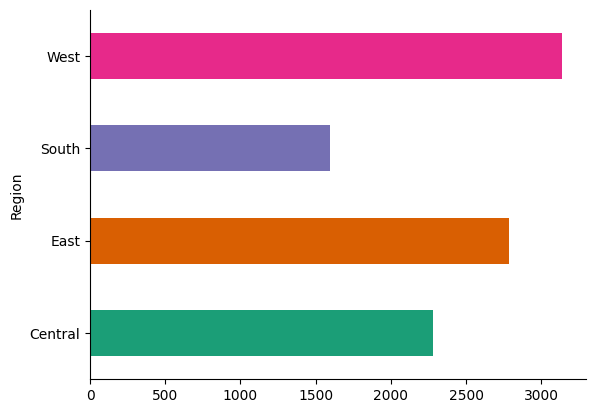

In [9]:
# @title Region

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

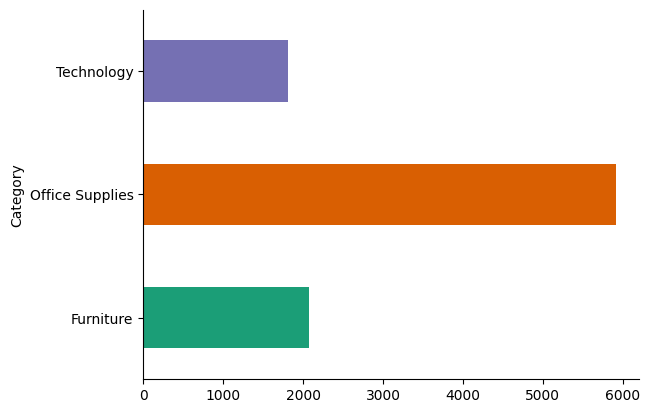

In [10]:
# @title Category

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

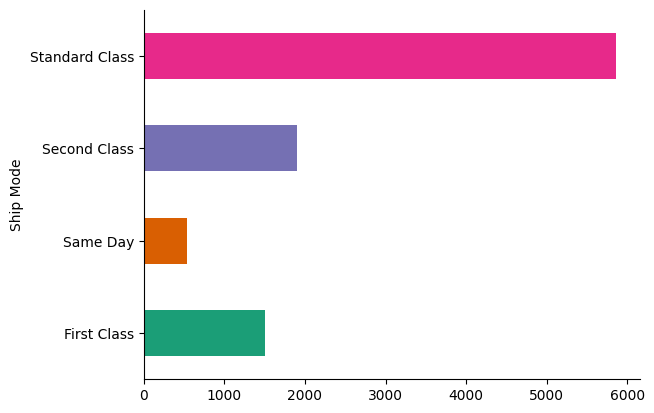

In [11]:
# @title Ship Mode

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Ship Mode').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

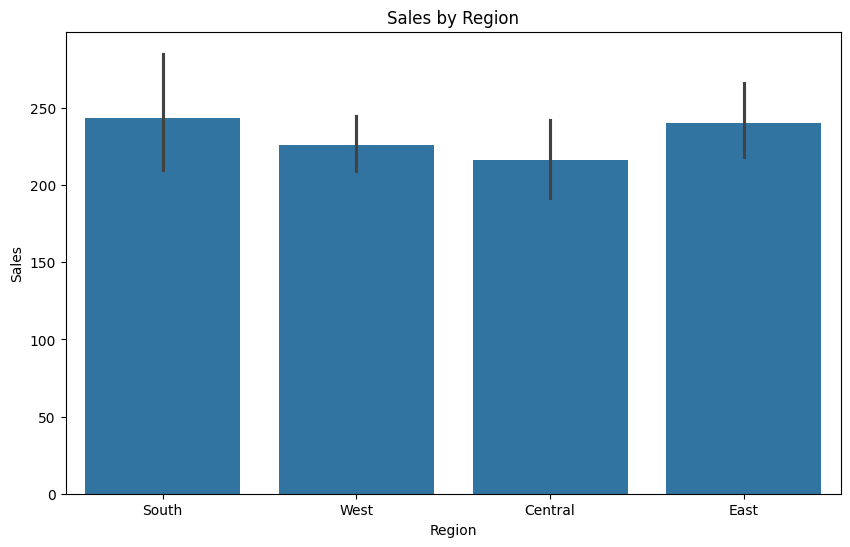

In [190]:
data.groupby('Region')['Sales'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=data)
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Sales by Region')
plt.show()

In [191]:
data['City'].value_counts()

City
New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
                ... 
San Mateo          1
Cheyenne           1
Conway             1
Melbourne          1
Springdale         1
Name: count, Length: 529, dtype: int64

<ipython-input-14-f81183caf747>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cities.values, y=cities.index,palette='mako')


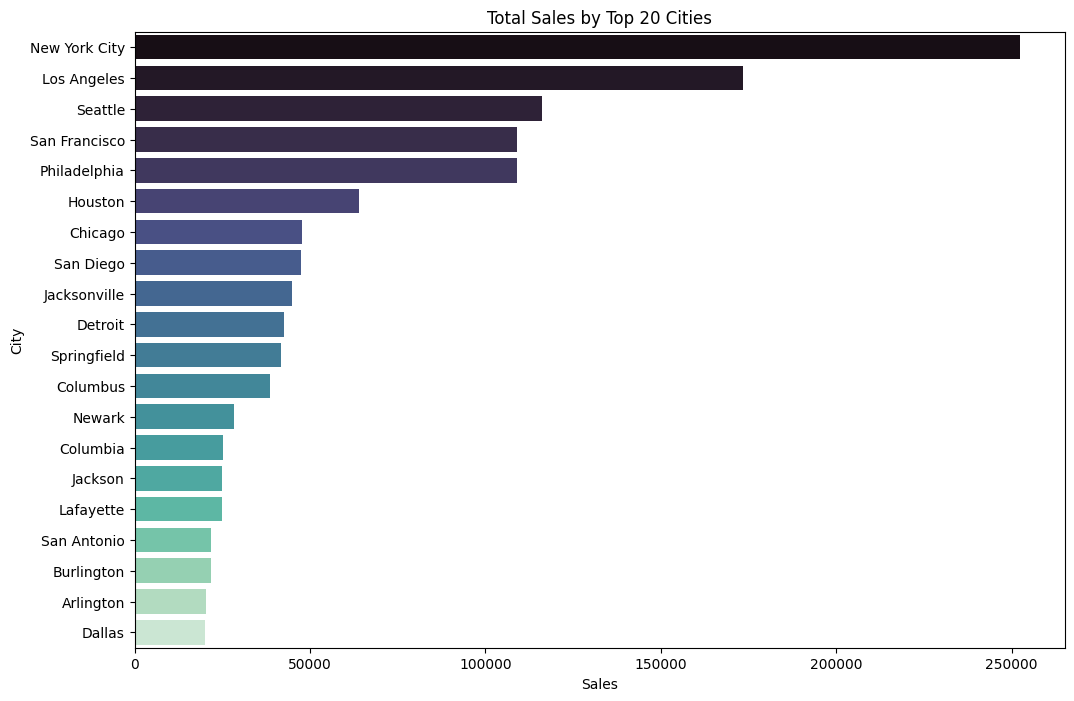

In [14]:

cities = data.groupby('City')['Sales'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 8))


sns.barplot(x=cities.values, y=cities.index,palette='mako')
plt.title('Total Sales by Top 20 Cities')
plt.xlabel('Sales')
plt.ylabel('City')
plt.show()

In [15]:
data.groupby('State')['Sales'].sum()


State
Alabama                  19510.6400
Arizona                  35272.6570
Arkansas                 11678.1300
California              446306.4635
Colorado                 31841.5980
Connecticut              13384.3570
Delaware                 27322.9990
District of Columbia      2865.0200
Florida                  88436.5320
Georgia                  48219.1100
Idaho                     4382.4860
Illinois                 79236.5170
Indiana                  48718.4000
Iowa                      4443.5600
Kansas                    2914.3100
Kentucky                 36458.3900
Louisiana                 9131.0500
Maine                     1270.5300
Maryland                 23705.5230
Massachusetts            28634.4340
Michigan                 76136.0740
Minnesota                29863.1500
Mississippi              10771.3400
Missouri                 22205.1500
Montana                   5589.3520
Nebraska                  7464.9300
Nevada                   16729.1020
New Hampshire         

<ipython-input-16-93f9f43f1018>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=State.values, y=State.index,palette='rocket')


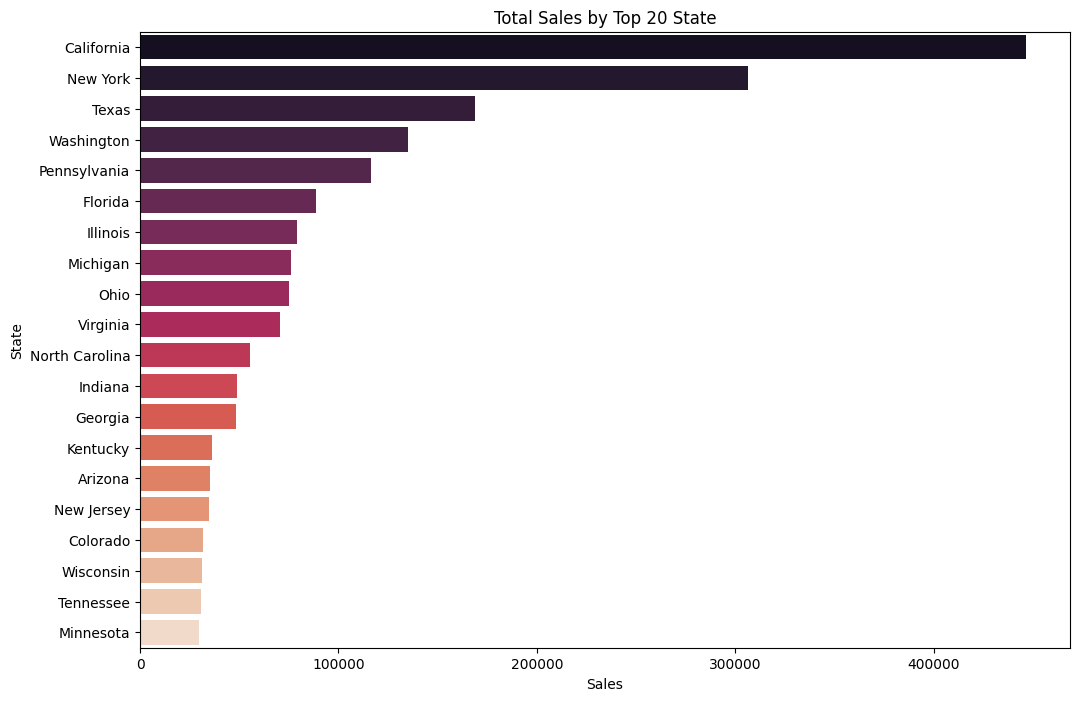

In [16]:

State = data.groupby('State')['Sales'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=State.values, y=State.index,palette='rocket')
plt.title('Total Sales by Top 20 State')
plt.xlabel('Sales')
plt.ylabel('State')
plt.show()

In [192]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Ship Mode'] = le.fit_transform(data['Ship Mode'])
data['Segment'] = le.fit_transform(data['Segment'])
data['City'] = le.fit_transform(data['City'])
data['State'] = le.fit_transform(data['State'])
data['Region'] = le.fit_transform(data['Region'])
data['Category'] = le.fit_transform(data['Category'])
data['Sub-Category'] = le.fit_transform(data['Sub-Category'])

In [193]:
data.head()

Order Date  Ship Mode  Segment  City  State  Postal Code  Region  Category  \
0  08/11/2017          2        0   194     15      42420.0       2         0   
1  08/11/2017          2        0   194     15      42420.0       2         0   
2  12/06/2017          2        1   265      3      90036.0       3         1   
3  11/10/2016          3        0   153      8      33311.0       2         0   
4  11/10/2016          3        0   153      8      33311.0       2         1   

   Sub-Category     Sales  
0             4  261.9600  
1             5  731.9400  
2            10   14.6200  
3            16  957.5775  
4            14   22.3680

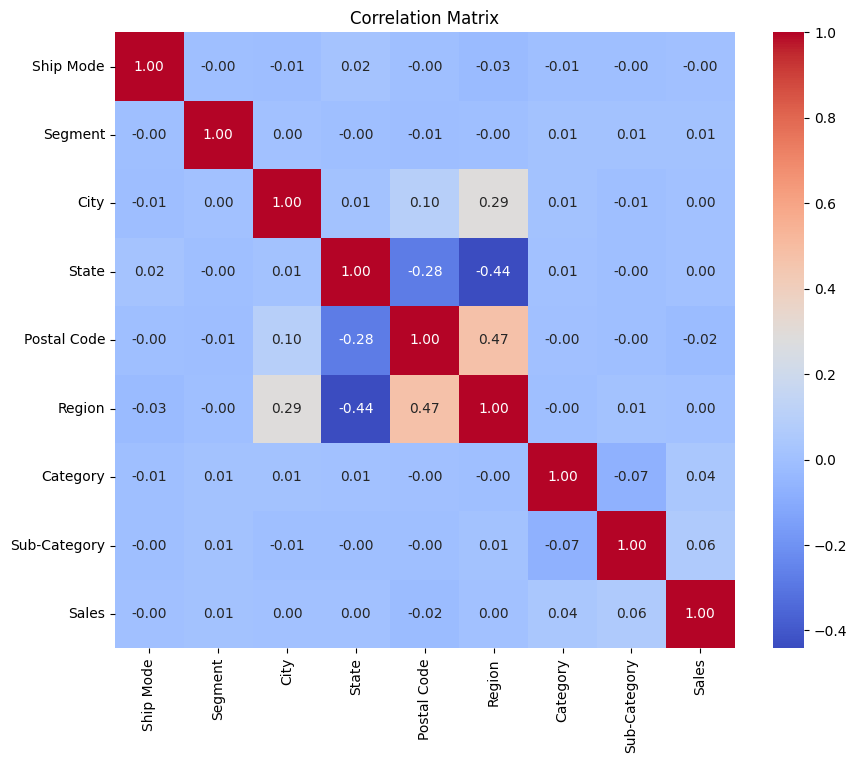

In [19]:
numeric_data = data.select_dtypes(include=['float', 'int'])
correlation_matrix = numeric_data.corr()
# Display the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [195]:
data.drop(['Ship Mode','City','State','Region'],axis=1,inplace=True)
data.head()

Order Date  Segment  Postal Code  Category  Sub-Category     Sales
0  08/11/2017        0      42420.0         0             4  261.9600
1  08/11/2017        0      42420.0         0             5  731.9400
2  12/06/2017        1      90036.0         1            10   14.6200
3  11/10/2016        0      33311.0         0            16  957.5775
4  11/10/2016        0      33311.0         1            14   22.3680

In [20]:
df= data[['Order Date','Sales']]

In [21]:
df.head()

Order Date     Sales
0  08/11/2017  261.9600
1  08/11/2017  731.9400
2  12/06/2017   14.6200
3  11/10/2016  957.5775
4  11/10/2016   22.3680

In [22]:
df['Order Date']= pd.to_datetime(df['Order Date'], format="%d/%m/%Y")
df.sort_values('Order Date', inplace=True)
df.head()

<ipython-input-22-7d510aafca8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date']= pd.to_datetime(df['Order Date'], format="%d/%m/%Y")
<ipython-input-22-7d510aafca8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values('Order Date', inplace=True)


Order Date    Sales
7980 2015-01-03   16.448
741  2015-01-04    3.540
740  2015-01-04  272.736
739  2015-01-04   11.784
1759 2015-01-05   19.536

In [23]:
df.reset_index(drop=True, inplace=True)
df.head()

Order Date    Sales
0 2015-01-03   16.448
1 2015-01-04    3.540
2 2015-01-04  272.736
3 2015-01-04   11.784
4 2015-01-05   19.536

In [24]:
df['Sales']= df.groupby('Order Date')['Sales'].transform('sum')
df.head()

<ipython-input-24-aa715e7c76bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales']= df.groupby('Order Date')['Sales'].transform('sum')


Order Date    Sales
0 2015-01-03   16.448
1 2015-01-04  288.060
2 2015-01-04  288.060
3 2015-01-04  288.060
4 2015-01-05   19.536

In [25]:
df.drop_duplicates(subset='Order Date', keep='last', inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

<ipython-input-25-ff33ff2f7715>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset='Order Date', keep='last', inplace=True)


Order Date     Sales
0 2015-01-03    16.448
1 2015-01-04   288.060
2 2015-01-05    19.536
3 2015-01-06  4407.100
4 2015-01-07    87.158

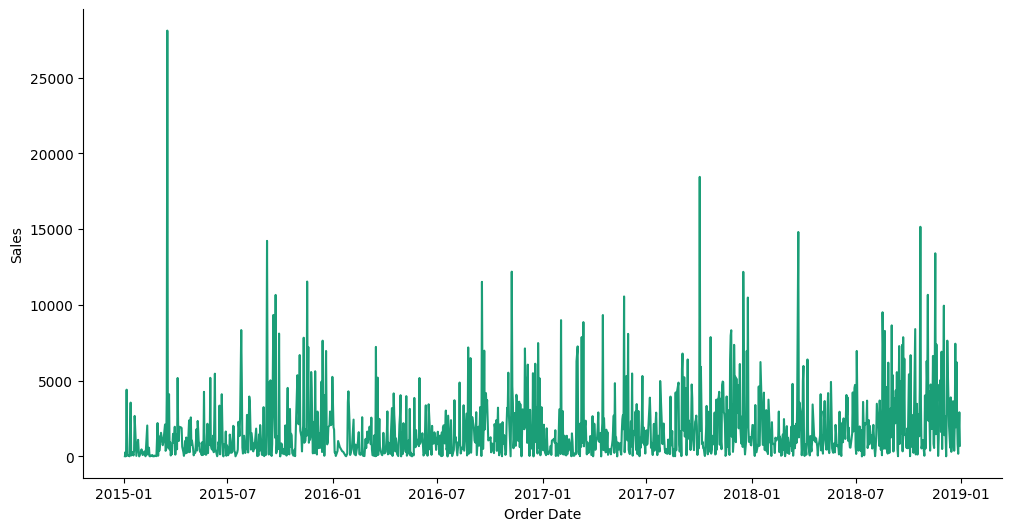

In [26]:
# @title Order Date vs Sales

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Order Date']
  ys = series['Sales']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Order Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Order Date')
_ = plt.ylabel('Sales')

In [27]:
df.shape

(1230, 2)

In [28]:
df['Year']= df['Order Date'].dt.year
df['Month']= df['Order Date'].dt.month
df['DayOfWeek']=df['Order Date'].dt.day_name()
df['Day']= df['Order Date'].dt.day
df.head()

<ipython-input-28-9a39af20dbc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year']= df['Order Date'].dt.year
<ipython-input-28-9a39af20dbc8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month']= df['Order Date'].dt.month
<ipython-input-28-9a39af20dbc8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

Order Date     Sales  Year  Month  DayOfWeek  Day
0 2015-01-03    16.448  2015      1   Saturday    3
1 2015-01-04   288.060  2015      1     Sunday    4
2 2015-01-05    19.536  2015      1     Monday    5
3 2015-01-06  4407.100  2015      1    Tuesday    6
4 2015-01-07    87.158  2015      1  Wednesday    7

In [36]:
import plotly.express as px

# Extract day of the week from 'Order Date' and map to day names
df['DayOfWeek'] = df['Order Date'].dt.day_name()

# Group sales by day of the week and calculate total sales for each day
daily_sales = df.groupby('DayOfWeek')['Sales'].sum().reset_index()
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Create the interactive bar chart with ordered days
fig = px.bar(daily_sales, x='DayOfWeek', y='Sales',
             labels={'DayOfWeek': 'Day of the Week', 'Sales': 'Total Sales'},
             title='Sales vs Day of the Week',
             category_orders={"DayOfWeek": day_order})
fig.show()

<ipython-input-36-40fd3d7d04c6>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
# Extract month name from 'Order Date'
df['MonthOfYear'] = df['Order Date'].dt.month_name()

# Group sales by month and calculate total sales for each month
monthly_sales = df.groupby('MonthOfYear')['Sales'].sum().reset_index()

# Define the desired order of months
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

# Create the interactive bar chart with ordered months
fig = px.bar(monthly_sales, x='MonthOfYear', y='Sales',
             labels={'MonthOfYear': 'Month of the Year', 'Sales': 'Total Sales'},
             title='Sales vs Month of the Year',
             category_orders={"MonthOfYear": month_order})
fig.show()

<ipython-input-37-8074e3cf2650>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
df.head()


Order Date     Sales  Year  Month  DayOfWeek  Day MonthOfYear
0 2015-01-03    16.448  2015      1   Saturday    3     January
1 2015-01-04   288.060  2015      1     Sunday    4     January
2 2015-01-05    19.536  2015      1     Monday    5     January
3 2015-01-06  4407.100  2015      1    Tuesday    6     January
4 2015-01-07    87.158  2015      1  Wednesday    7     January

In [39]:
df.drop(['DayOfWeek','MonthOfYear'], axis=1,inplace=True)
df.head()

<ipython-input-39-3229bf80b112>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Order Date     Sales  Year  Month  Day
0 2015-01-03    16.448  2015      1    3
1 2015-01-04   288.060  2015      1    4
2 2015-01-05    19.536  2015      1    5
3 2015-01-06  4407.100  2015      1    6
4 2015-01-07    87.158  2015      1    7

##Regression Based Models

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [42]:
df['Lag1']=df['Sales'].shift(1)
df['Lag2']=df['Sales'].shift(2)
df['Lag3']=df['Sales'].shift(3)
df['Lag4']=df['Sales'].shift(4)
df['Lag5']=df['Sales'].shift(5)
df['Lag6']=df['Sales'].shift(6)
df['Lag7']=df['Sales'].shift(7)
df['Lag8']=df['Sales'].shift(8)
df.dropna(inplace=True)
df.head()

<ipython-input-42-ce7232c132bb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-42-ce7232c132bb>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-42-ce7232c132bb>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-42-ce7232c

Order Date     Sales  Year  Month  Day      Lag1      Lag2      Lag3  \
8  2015-01-13  3553.795  2015      1   13     9.940    54.830    40.544   
9  2015-01-14    61.960  2015      1   14  3553.795     9.940    54.830   
10 2015-01-15   149.950  2015      1   15    61.960  3553.795     9.940   
11 2015-01-16   299.964  2015      1   16   149.950    61.960  3553.795   
12 2015-01-18    64.864  2015      1   18   299.964   149.950    61.960   

        Lag4      Lag5      Lag6      Lag7      Lag8  
8     87.158  4407.100    19.536   288.060    16.448  
9     40.544    87.158  4407.100    19.536   288.060  
10    54.830    40.544    87.158  4407.100    19.536  
11     9.940    54.830    40.544    87.158  4407.100  
12  3553.795     9.940    54.830    40.544    87.158

In [75]:
llr_model= LinearRegression()
rfr_model=RandomForestRegressor()
xgb_model=xgb.XGBRegressor()

In [44]:
x1,x2,x3,y = df['Lag1'],df['Lag2'],df['Lag3'],df['Sales']
x1,x2,x3,y = np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1=x1.reshape(-1,1)
x2=x2.reshape(-1,1)
x3=x3.reshape(-1,1)
x4=df['Lag4'].values.reshape(-1,1)
x5=df['Lag5'].values.reshape(-1,1)
x6=df['Lag6'].values.reshape(-1,1)
x7=df['Lag7'].values.reshape(-1,1)
x8=df['Lag8'].values.reshape(-1,1)
x9=df['Day'].values.reshape(-1,1)
x10=df['Month'].values.reshape(-1,1)
x11=df['Year'].values.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11),axis=1)
final_x

array([[9.9400000e+00, 5.4830000e+01, 4.0544000e+01, ..., 1.3000000e+01,
        1.0000000e+00, 2.0150000e+03],
       [3.5537950e+03, 9.9400000e+00, 5.4830000e+01, ..., 1.4000000e+01,
        1.0000000e+00, 2.0150000e+03],
       [6.1960000e+01, 3.5537950e+03, 9.9400000e+00, ..., 1.5000000e+01,
        1.0000000e+00, 2.0150000e+03],
       ...,
       [1.7763600e+02, 8.1459400e+02, 2.6989270e+03, ..., 2.8000000e+01,
        1.2000000e+01, 2.0180000e+03],
       [1.6573508e+03, 1.7763600e+02, 8.1459400e+02, ..., 2.9000000e+01,
        1.2000000e+01, 2.0180000e+03],
       [2.9155340e+03, 1.6573508e+03, 1.7763600e+02, ..., 3.0000000e+01,
        1.2000000e+01, 2.0180000e+03]])

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=final_x[:-45],final_x[-45:],y[:-45],y[-45:]

In [77]:
llr_model.fit(x_train,y_train)
rfr_model.fit(x_train,y_train)
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

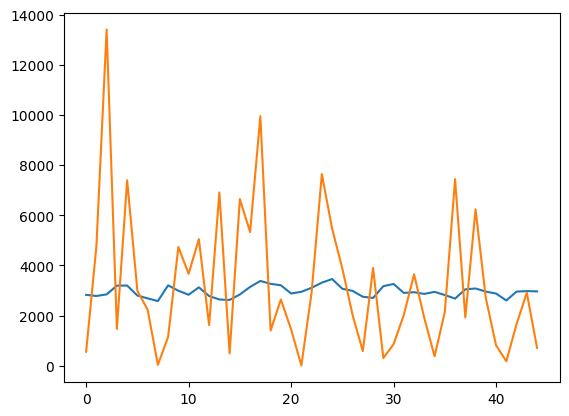

In [78]:
predictions_llr=llr_model.predict(x_test)
plt.plot(predictions_llr)
plt.plot(y_test)

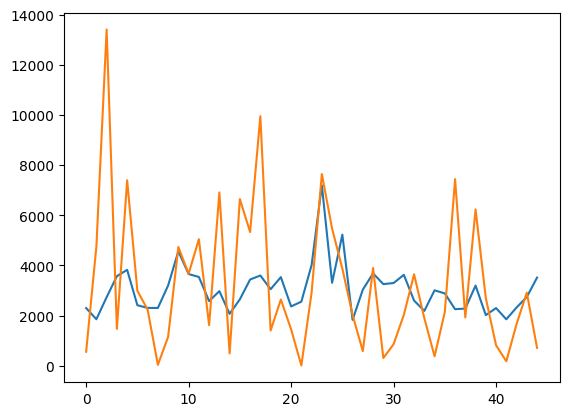

In [79]:
rlf_pred = rfr_model.predict(x_test)
plt.plot(rlf_pred)
plt.plot(y_test)

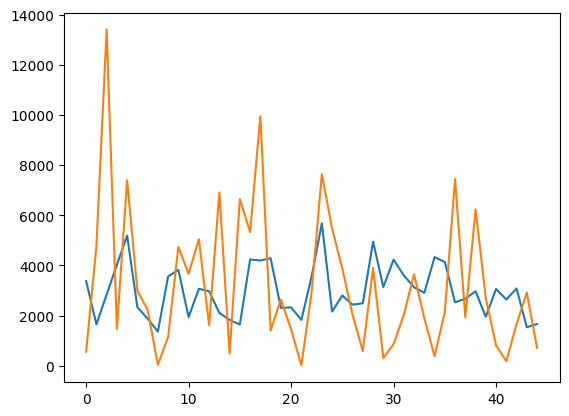

In [80]:
predictions_xgb=xgb_model.predict(x_test)
plt.plot(predictions_xgb)
plt.plot(y_test)

In [81]:
from sklearn.metrics import mean_squared_error
print("RMSE value for linear Regression = ",np.sqrt(mean_squared_error(predictions_llr,y_test)))
print("RMSE value for RandomForest = ",np.sqrt(mean_squared_error(rlf_pred,y_test)))
print("RMSE value for XGBoost = ",np.sqrt(mean_squared_error(predictions_xgb,y_test)))

RMSE value for linear Regression =  2849.0436115441375
RMSE value for RandomForest =  2724.826973284749
RMSE value for XGBoost =  2871.3983451861636


In [82]:
model=RandomForestRegressor()
model.fit(df[['Lag1','Lag2','Lag3','Lag4','Lag5','Lag6','Lag7','Lag8','Day','Month','Year']],df['Sales'])

RandomForestRegressor()

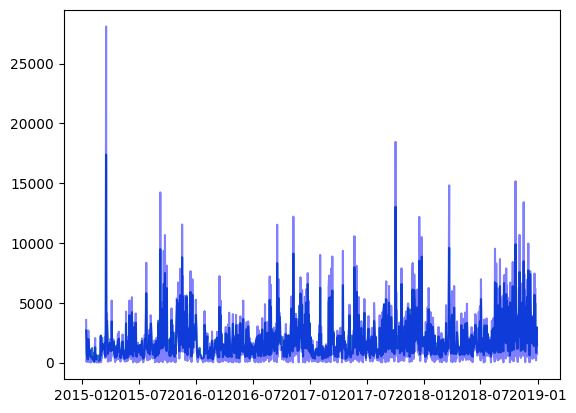

In [83]:
y = model.predict(df[['Lag1', 'Lag2', 'Lag3','Lag4','Lag5','Lag6','Lag7','Lag8', 'Day', 'Month', 'Year']])
plt.plot(df['Order Date'], y)
plt.plot(df['Order Date'], df['Sales'], alpha=0.5,color='blue')

##Time Series Forecasting Model - ARIMA

In [330]:
data.head()

index  Segment  Postal Code  Category  Sub-Category     Sales
Order Date                                                               
2015-01-03    0.0      0.0      77095.0       1.0          12.0    16.448
2015-01-04    1.0      2.0      60540.0       1.0          10.0   288.060
2015-01-05    2.0      0.0      19143.0       1.0           2.0    19.536
2015-01-06    3.0      2.0      42420.0       1.0           8.0  4407.100
2015-01-07    4.0      0.0      77340.0       0.0           9.0    87.158

In [331]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['Sales'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -6.251366
p-value: 0.000000


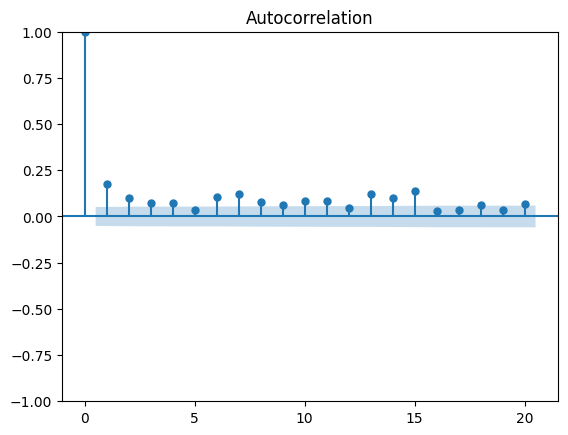

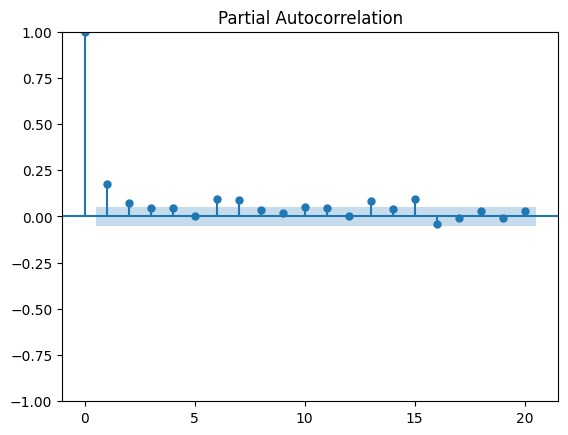

In [337]:

# prompt: plot acf and pacf for new_df
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf

sm.graphics.tsa.plot_acf(data['Sales'],lags = 20)
sm.graphics.tsa.plot_pacf(data['Sales'],lags = 20)
plt.show()

In [363]:
df_new= data[['Order Date','Sales']]
df_new.reset_index(drop=True, inplace=True)
df_new.set_index('Order Date',inplace=True)
df_new.head()

Sales
Order Date          
2015-01-03    16.448
2015-01-04   288.060
2015-01-05    19.536
2015-01-06  4407.100
2015-01-07    87.158

In [364]:
# Splitting: e.g., 80% train, 20% test
split_index = int(len(data) * 0.8)
train_data = df_new.iloc[:split_index]
test_data = df_new.iloc[split_index:]

In [365]:
train_data.dtypes

Sales    float64
dtype: object

In [366]:
!pip install pmdarima

In [374]:
import itertools
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas as pd
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")


# Fill any missing values (NaN) introduced by coercion
train_data['Sales'] = train_data['Sales'].fillna(method='ffill')

# Define ranges for p, d, q
p_values = range(0, 5)
d_values = range(0, 3)
q_values = range(0, 4)

best_score, best_order = float("inf"), None
for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        model = ARIMA(train_data['Sales'], order=(p, d, q))
        model_fit = model.fit()
        predictions = model_fit.predict()
        rmse = mean_squared_error(train_data['Sales'], predictions, squared=False)
        aic = model_fit.aic

        print(f"ARIMA({p}, {d}, {q}) - AIC: {aic}") # Print AIC for each iteration

        if aic < best_score:
            best_score, best_order = aic, (p, d, q)
    except Exception as e:
        print(f"Error fitting model with order ({p}, {d}, {q}): {e}")

print('\nBest ARIMA Order:', best_order)
print('Best AIC Score:', best_score)

ARIMA(0, 0, 0) - AIC: 21143.397632583525
ARIMA(0, 0, 1) - AIC: 21113.319118876694
ARIMA(0, 0, 2) - AIC: 21110.353942253365
ARIMA(0, 0, 3) - AIC: 21106.61845343046
ARIMA(0, 1, 0) - AIC: 21706.855531365567
ARIMA(0, 1, 1) - AIC: 21089.36890008286
ARIMA(0, 1, 2) - AIC: 21077.235486598092
ARIMA(0, 1, 3) - AIC: 21078.52422309754
ARIMA(0, 2, 0) - AIC: 22925.721290469177
ARIMA(0, 2, 1) - AIC: 21697.45966896259
ARIMA(0, 2, 2) - AIC: 21085.319330108356
ARIMA(0, 2, 3) - AIC: 21152.676745781577
ARIMA(1, 0, 0) - AIC: 21109.176427777697
ARIMA(1, 0, 1) - AIC: 21094.420225923415
ARIMA(1, 0, 2) - AIC: 21087.979282883138
ARIMA(1, 0, 3) - AIC: 21089.796934274586
ARIMA(1, 1, 0) - AIC: 21447.66121695128
ARIMA(1, 1, 1) - AIC: 21076.563758401993
ARIMA(1, 1, 2) - AIC: 21082.52871433955
ARIMA(1, 1, 3) - AIC: 21084.080286461198
ARIMA(1, 2, 0) - AIC: 22320.715656432054
ARIMA(1, 2, 1) - AIC: 21438.60266035727
ARIMA(1, 2, 2) - AIC: 21185.90774600516
ARIMA(1, 2, 3) - AIC: 21089.308022675275
ARIMA(2, 0, 0) - AIC: 21

In [377]:
test_data.fillna(test_data.mean(), inplace=True)

In [379]:
final_model = ARIMA(train_data['Sales'], order=best_order)
final_model_fit = final_model.fit()

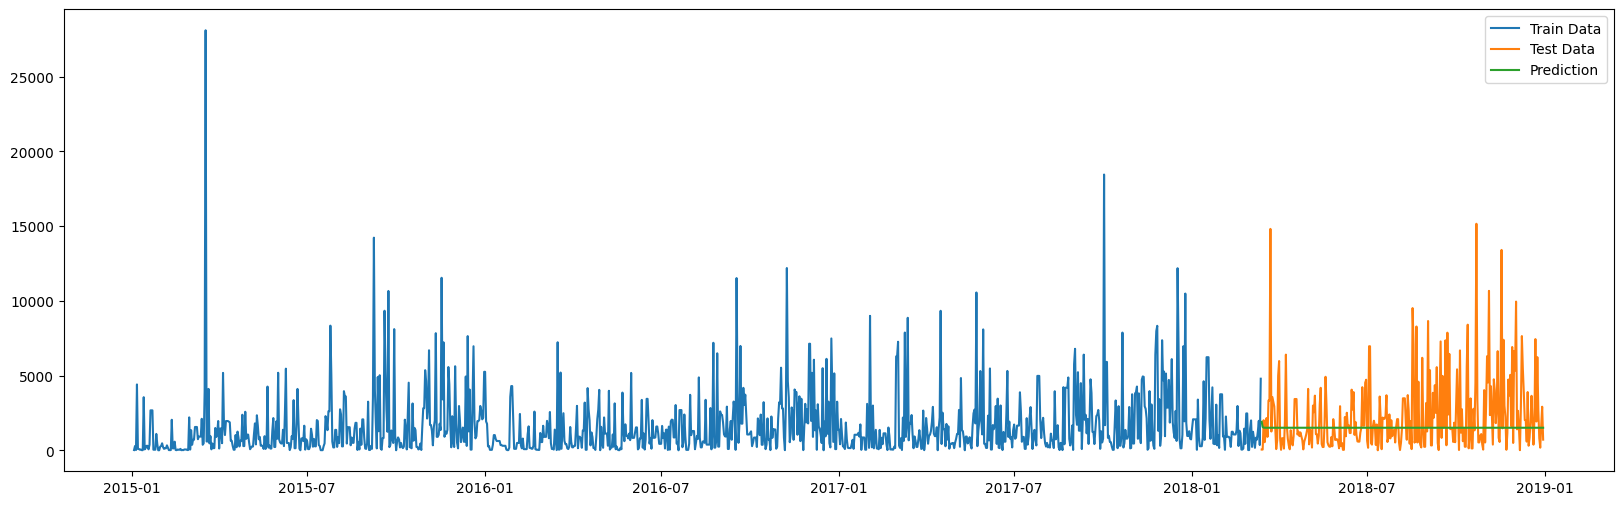

In [381]:
predictions = final_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
plt.figure(figsize=(20, 6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data')
plt.plot(predictions, label='Prediction')
plt.legend()
plt.show()

In [386]:
from sklearn.metrics import mean_squared_error
import pandas as pd

# Calculate RMSE
rmse_value = mean_squared_error(predictions, test_data['Sales'], squared=False)  # Assuming 'Sales' is the relevant column in test_data
print(rmse_value)

2603.8718329484973


##PROPHET Model

In [84]:
!pip install prophet

In [85]:
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

In [86]:
x1=data['Order Date']
y1=data['Sales']
dff=pd.DataFrame({'Date':x1,'Sale':y1})

In [89]:
dff['Date'] = pd.to_datetime(dff['Date'], format="%d/%m/%Y")
dff.sort_values(by="Date", inplace=True)

dff['Daily Sale']=dff.groupby('Date')['Sale'].transform('sum')
dff.drop('Sale',axis=1,inplace=True)
dff.head()

Date  Daily Sale
7980 2015-01-03      16.448
741  2015-01-04     288.060
740  2015-01-04     288.060
739  2015-01-04     288.060
1759 2015-01-05      19.536

In [90]:
dff.reset_index(drop=True, inplace=True)
dff.drop_duplicates(subset='Date', keep='last', inplace=True)
dff.reset_index(drop=True, inplace=True)
dff.head()

Date  Daily Sale
0 2015-01-03      16.448
1 2015-01-04     288.060
2 2015-01-05      19.536
3 2015-01-06    4407.100
4 2015-01-07      87.158

In [91]:
train=dff.iloc[:-60]
test=dff.iloc[-60:]
print(train.shape)
print(test.shape)

(1170, 2)
(60, 2)


In [92]:
dff.shape

(1230, 2)

In [93]:
train = train.rename(columns={'Date': 'ds', 'Daily Sale': 'y'})
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmhli411h/89jp5hv9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmhli411h/rgqo_byc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57747', 'data', 'file=/tmp/tmpmhli411h/89jp5hv9.json', 'init=/tmp/tmpmhli411h/rgqo_byc.json', 'output', 'file=/tmp/tmpmhli411h/prophet_modelp6zdhqcc/prophet_model-20240706134537.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:45:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:45:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [94]:
forecast.tail()

ds        trend  yhat_lower   yhat_upper  trend_lower  \
1225 2018-12-25  2244.588000  589.350525  6243.773772  2243.638059   
1226 2018-12-26  2245.416211  242.159693  5851.231678  2244.423163   
1227 2018-12-27  2246.244422 -425.327736  4736.837994  2245.215467   
1228 2018-12-28  2247.072633  -50.697439  5404.094305  2245.997885   
1229 2018-12-29  2247.900843  213.887594  5684.745465  2246.809696   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
1225  2245.345342     1217.104616           1217.104616           1217.104616   
1226  2246.187749      679.155392            679.155392            679.155392   
1227  2247.045347      113.834979            113.834979            113.834979   
1228  2247.918958      412.047368            412.047368            412.047368   
1229  2248.768422      682.236066            682.236066            682.236066   

          weekly  weekly_lower  weekly_upper      yearly  yearly_lower  \
1225  375.680238    375.680238    375.680238  841.424377    841.424377   
1226  -67.026719    -67.026719    -67.026719  746.182112    746.182112   
1227 -528.880309   -528.880309   -528.880309  642.715288    642.715288   
1228 -120.292202   -120.292202   -120.292202  532.339570    532.339570   
1229  265.699373    265.699373    265.699373  416.536692    416.536692   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
1225    841.424377                   0.0                         0.0   
1226    746.182112                   0.0                         0.0   
1227    642.715288                   0.0                         0.0   
1228    532.339570                   0.0                         0.0   
1229    416.536692                   0.0                         0.0   

      multiplicative_terms_upper         yhat  
1225                         0.0  3461.692616  
1226                         0.0  2924.571604  
1227                         0.0  2360.079401  
1228                         0.0  2659.120000  
1229                         0.0  2930.136909

In [95]:
fig = plot_plotly(m, forecast)

In [96]:
import plotly.io as pio
pio.renderers.default = 'colab'
fig.show()

In [97]:
from statsmodels.tools.eval_measures import rmse
pred= forecast['yhat'].iloc[:-60]
rmse(pred,dff['Daily Sale'][:-60])

2113.1469473728675

In [98]:
pred_test= forecast['yhat'].iloc[-60:]

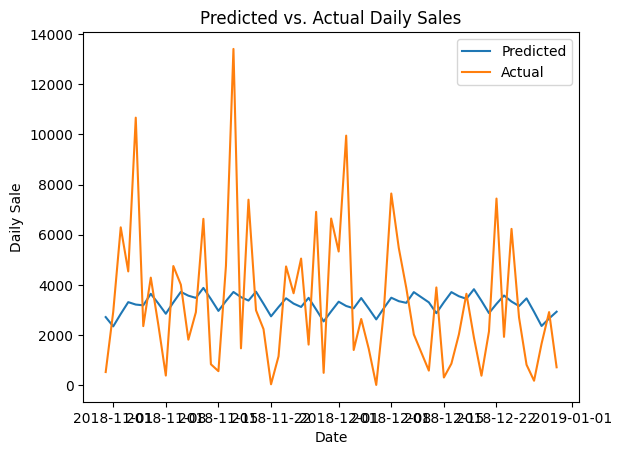

In [99]:
plt.plot(dff['Date'][-60:], pred_test)  # x-values first, then y-values
plt.plot(dff['Date'][-60:], dff['Daily Sale'][-60:])  # Ensure both plots use the same x-axis
plt.xlabel('Date')  # Label the x-axis
plt.ylabel('Daily Sale')  # Label the y-axis
plt.title('Predicted vs. Actual Daily Sales')  # Add a title
plt.legend(['Predicted', 'Actual'])  # Add a legend
plt.show()

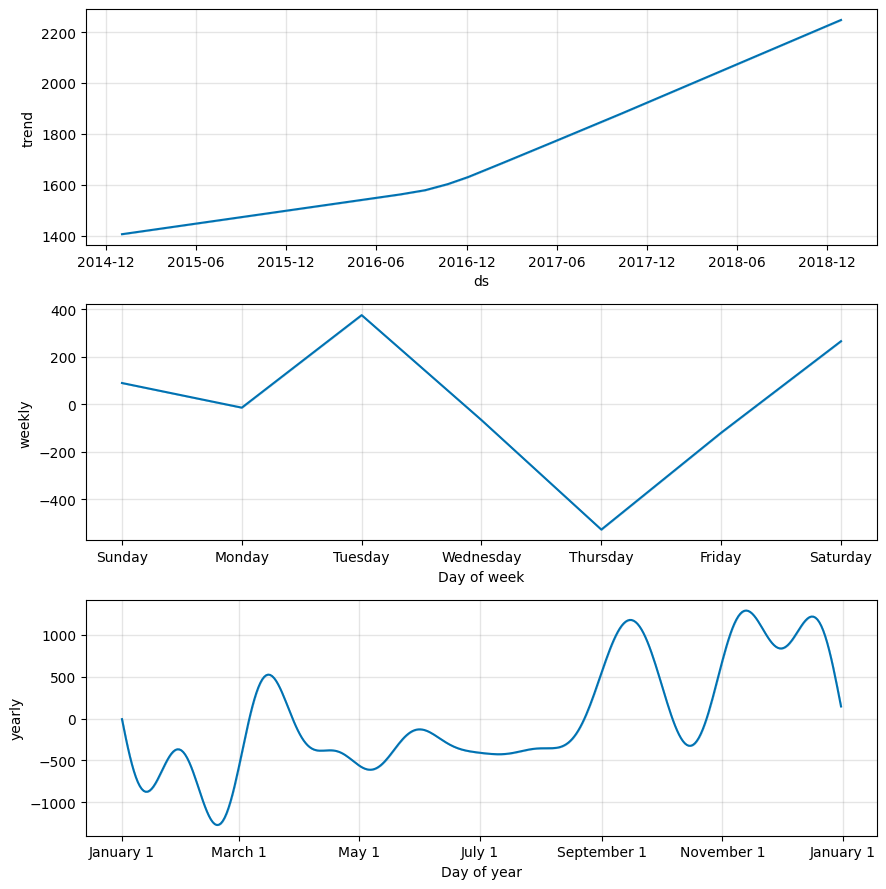

In [100]:
fig = m.plot_components(forecast)
fig.show()

##LSTM Model

In [252]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [272]:
data.head()

index  Segment  Postal Code  Category  Sub-Category     Sales
Order Date                                                               
2015-01-03    0.0      0.0      77095.0       1.0          12.0    16.448
2015-01-04    1.0      2.0      60540.0       1.0          10.0   288.060
2015-01-05    2.0      0.0      19143.0       1.0           2.0    19.536
2015-01-06    3.0      2.0      42420.0       1.0           8.0  4407.100
2015-01-07    4.0      0.0      77340.0       0.0           9.0    87.158

In [298]:
dff=pd.DataFrame({'Date':x1,'Sales':y1})
dff.head()

Date     Sales
0  08/11/2017  261.9600
1  08/11/2017  731.9400
2  12/06/2017   14.6200
3  11/10/2016  957.5775
4  11/10/2016   22.3680

In [299]:
dff.dtypes

Date      object
Sales    float64
dtype: object

In [300]:
dff['Date'] = pd.to_datetime(dff['Date'], format="%d/%m/%Y")
dff.sort_values(by="Date", inplace=True)

In [302]:
dff.reset_index(drop=True, inplace=True)
dff.head()

Date    Sales
0 2015-01-03   16.448
1 2015-01-04    3.540
2 2015-01-04  272.736
3 2015-01-04   11.784
4 2015-01-05   19.536

In [303]:
dff['Sales']=dff.groupby('Date')['Sales'].transform('sum')
dff.head()

Date    Sales
0 2015-01-03   16.448
1 2015-01-04  288.060
2 2015-01-04  288.060
3 2015-01-04  288.060
4 2015-01-05   19.536

In [304]:
dff.drop_duplicates(subset='Date', keep='last', inplace=True)
dff.reset_index(drop=True, inplace=True)
dff.head()

Date     Sales
0 2015-01-03    16.448
1 2015-01-04   288.060
2 2015-01-05    19.536
3 2015-01-06  4407.100
4 2015-01-07    87.158

In [305]:
dff.set_index('Date',inplace=True)
dff.head()

Sales
Date                
2015-01-03    16.448
2015-01-04   288.060
2015-01-05    19.536
2015-01-06  4407.100
2015-01-07    87.158

In [306]:
scaler = MinMaxScaler()
scaler.fit(dff)
ndff=scaler.transform(dff)
ndff


array([[0.00051319],
       [0.01017748],
       [0.00062306],
       ...,
       [0.05889856],
       [0.10366629],
       [0.02532549]])

In [307]:
features=ndff
target=ndff[:,0]
print(features.shape)
print(target.shape)

(1230, 1)
(1230,)


In [328]:
train_size = int(0.8 * len(features))
train_features = features[:train_size]
test_features = features[train_size:]
train_target = target[:train_size]
test_target = target[train_size:]

[]

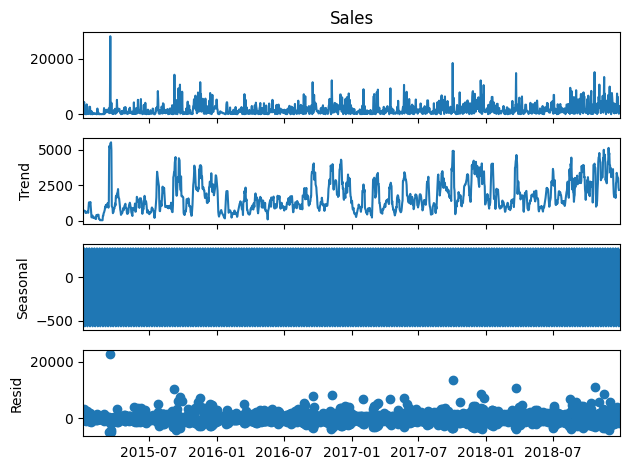

In [278]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(data['Sales'])
results.plot()
plt.plot()

In [310]:
n_length=3
batch_size=1
features_len=train_features.shape[1]

In [311]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
train_generator = TimeseriesGenerator(train_features, train_target, length=n_length, batch_size=batch_size)
test_generator = TimeseriesGenerator(test_features, test_target, length=n_length, batch_size=batch_size)


In [312]:
X,y=train_generator[0]
print(X.shape)
print(y.shape)

(1, 3, 1)
(1,)


In [313]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
model = Sequential()
model.add(LSTM(units=50, input_shape=(n_length, features_len)))
model.add(Dense(1))

In [314]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)
loss = 'mse'
model.compile(optimizer=optimizer, loss='mse')

In [315]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 50)                10400     
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [316]:
model_fit = model.fit(train_generator,epochs=10,validation_data=test_generator)

Epoch 1/10
981/981 [==============================] - 7s 5ms/step - loss: 0.0065 - val_loss: 0.0083
Epoch 2/10
981/981 [==============================] - 4s 4ms/step - loss: 0.0064 - val_loss: 0.0079
Epoch 3/10
981/981 [==============================] - 6s 6ms/step - loss: 0.0063 - val_loss: 0.0079
Epoch 4/10
981/981 [==============================] - 4s 4ms/step - loss: 0.0063 - val_loss: 0.0075
Epoch 5/10
981/981 [==============================] - 3s 3ms/step - loss: 0.0063 - val_loss: 0.0084
Epoch 6/10
981/981 [==============================] - 4s 4ms/step - loss: 0.0063 - val_loss: 0.0086
Epoch 7/10
981/981 [==============================] - 4s 4ms/step - loss: 0.0064 - val_loss: 0.0084
Epoch 8/10
981/981 [==============================] - 4s 4ms/step - loss: 0.0063 - val_loss: 0.0083
Epoch 9/10
981/981 [==============================] - 4s 4ms/step - loss: 0.0063 - val_loss: 0.0079
Epoch 10/10
981/981 [==============================] - 5s 5ms/step - loss: 0.0062 - val_loss: 0.0079

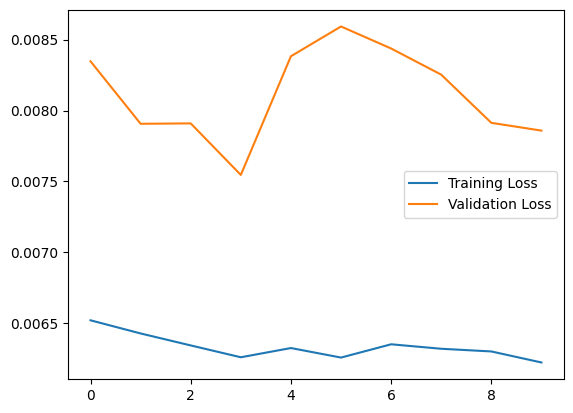

In [329]:
loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()

In [317]:
model.evaluate(test_generator)

243/243 [==============================] - 1s 2ms/step - loss: 0.0079


0.00785830244421959

In [319]:
predictions = model.predict(test_generator)
df_pred = pd.concat([pd.DataFrame(predictions),pd.DataFrame(test_features[:,1:][n_length:])], axis=1)

243/243 [==============================] - 1s 3ms/step


In [320]:
rev_trans = scaler.inverse_transform(df_pred)


In [321]:
df_final=dff[predictions.shape[0]*-1:]
df_final

Sales
Date                 
2018-04-10   755.5290
2018-04-11   319.8060
2018-04-12    69.6600
2018-04-13  1345.8240
2018-04-14   652.9300
...               ...
2018-12-26   814.5940
2018-12-27   177.6360
2018-12-28  1657.3508
2018-12-29  2915.5340
2018-12-30   713.7900

[243 rows x 1 columns]

In [322]:
df_final['Sales_Pred'] = rev_trans[:,0]

<ipython-input-322-2c95630d3cad>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [323]:
df_final

Sales   Sales_Pred
Date                              
2018-04-10   755.5290  1982.752319
2018-04-11   319.8060  1777.742310
2018-04-12    69.6600  1637.046143
2018-04-13  1345.8240  1584.374756
2018-04-14   652.9300  1682.816895
...               ...          ...
2018-12-26   814.5940  2060.625244
2018-12-27   177.6360  1822.637695
2018-12-28  1657.3508  1643.276733
2018-12-29  2915.5340  1721.857788
2018-12-30   713.7900  1872.189575

[243 rows x 2 columns]

<Axes: xlabel='Date'>

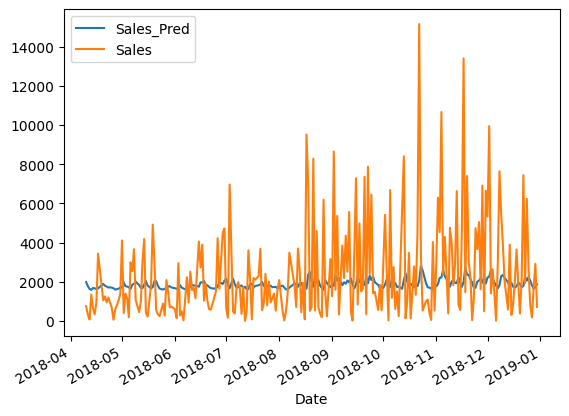

In [326]:
df_final[['Sales_Pred','Sales']].plot()

In [327]:
print("RMSE Value using LSTM =", np.sqrt(mean_squared_error(df_final['Sales'], df_final['Sales_Pred'])))

RMSE Value using LSTM = 2491.398749784788
